In [1]:
 # Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Set plot style
sns.set(style='whitegrid')

In [2]:
# Load the dataset
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [3]:
# Step 3: Data Overview
# Display the first few rows of the dataset
print(matches.head())
print(deliveries.head())

# Basic info
print(matches.info())
print(deliveries.info())


   id  season       city        date                        team1  \
0   1    2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2    2017       Pune  06-04-2017               Mumbai Indians   
2   3    2017     Rajkot  07-04-2017                Gujarat Lions   
3   4    2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5    2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

In [5]:
# Step 4: Data Cleaning
# Check for missing values
print(matches.isnull().sum())
print(deliveries.isnull().sum())

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed         0
dismissal_kind      170244
fielder             172630
dtype:

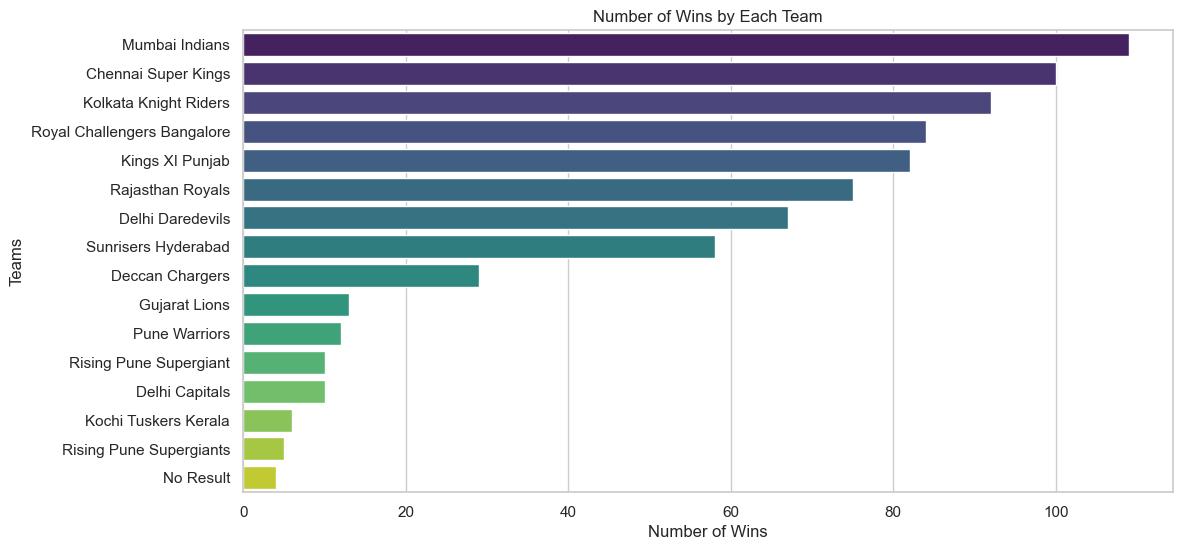

In [7]:
# Number of wins by each team
team_wins = matches['winner'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(y=team_wins.index, x=team_wins.values, palette="viridis")
plt.title('Number of Wins by Each Team')
plt.xlabel('Number of Wins')
plt.ylabel('Teams')
plt.show()

In [8]:
# Most successful teams
successful_teams = team_wins.head(5)
print("Most Successful Teams:")
print(successful_teams)

Most Successful Teams:
winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Name: count, dtype: int64


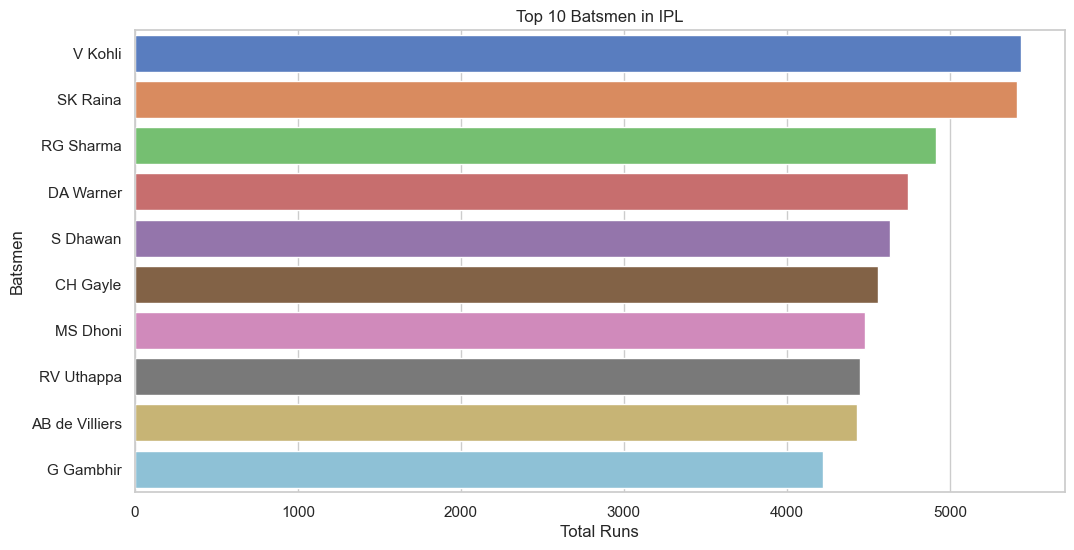

In [9]:
# Top batsmen
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(y=top_batsmen.index, x=top_batsmen.values, palette="muted")
plt.title('Top 10 Batsmen in IPL')
plt.xlabel('Total Runs')
plt.ylabel('Batsmen')
plt.show()

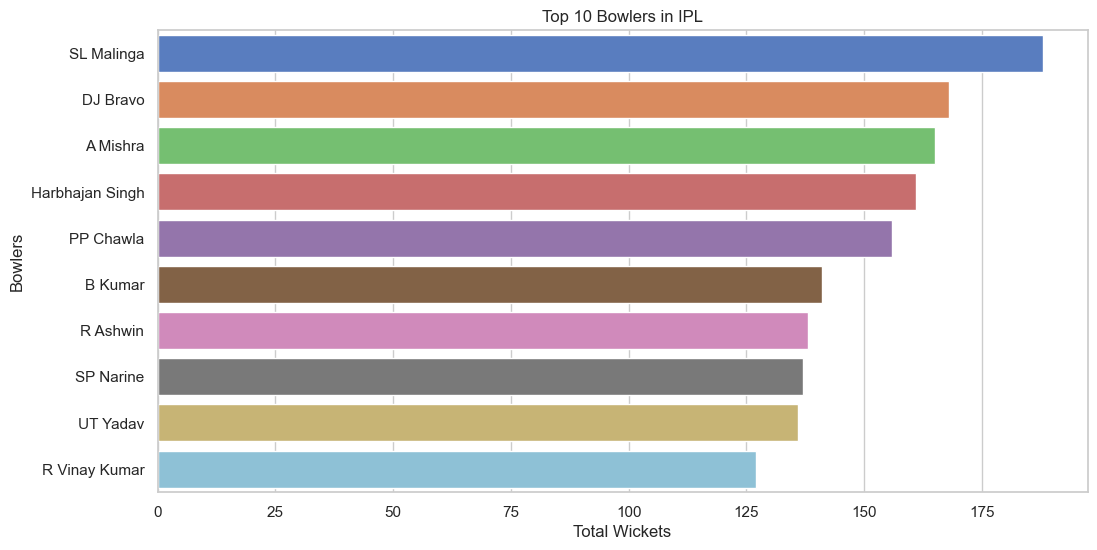

In [10]:
# Top bowlers
top_bowlers = deliveries.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(y=top_bowlers.index, x=top_bowlers.values, palette="muted")
plt.title('Top 10 Bowlers in IPL')
plt.xlabel('Total Wickets')
plt.ylabel('Bowlers')
plt.show()

In [11]:
# Toss decision impact
toss_decision = matches.groupby(['toss_winner', 'toss_decision']).size().unstack().fillna(0)
toss_win_match_win = matches[matches['toss_winner'] == matches['winner']]
toss_win_rate = len(toss_win_match_win) / len(matches) * 100
print(f"Percentage of matches won by teams winning the toss: {toss_win_rate:.2f}%")

Percentage of matches won by teams winning the toss: 51.98%


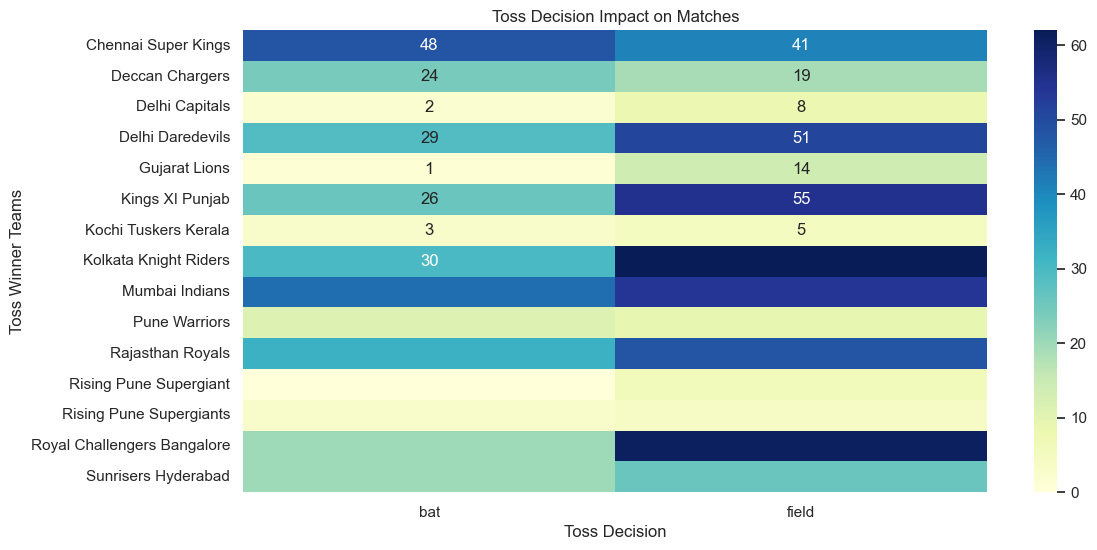

In [12]:
# Visualize the impact of toss decision
plt.figure(figsize=(12,6))
sns.heatmap(toss_decision, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Toss Decision Impact on Matches')
plt.xlabel('Toss Decision')
plt.ylabel('Toss Winner Teams')
plt.show()

In [13]:
# Recommend the most successful team
print("Teams recommended for endorsement based on success rate:")
print(successful_teams)

Teams recommended for endorsement based on success rate:
winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Name: count, dtype: int64


In [14]:
# Recommend top players for endorsement
top_batsman = top_batsmen.head(1).index[0]
top_bowler = top_bowlers.head(1).index[0]

print(f"Top Batsman recommended for endorsement: {top_batsman}")
print(f"Top Bowler recommended for endorsement: {top_bowler}")

Top Batsman recommended for endorsement: V Kohli
Top Bowler recommended for endorsement: SL Malinga
